In [1]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [2]:
%reset
from rocketpy import *

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Motor Setup


Motor Details
Total Burning Time: 1.65 s
Total Propellant Mass: 0.028 kg
Propellant Exhaust Velocity: 596.607 m/s
Average Thrust: 10.206 N
Maximum Thrust: 29.73 N at 0.282 s after ignition.
Total Impulse: 16.839 Ns

Plots


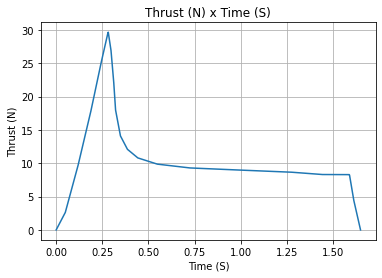

In [3]:

ESTESD12 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Estes_D12.eng",
    burnOut=1.7,
    grainNumber=1,
    grainDensity=1815,
    grainOuterRadius=18 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=50 / 1000,
)

ESTESD12.info()


#### Rocket Setup

Inertia Details
Rocket Dry Mass: 0.232 kg (No Propellant)
Rocket Total Mass: 0.2602248537980141 kg (With Propellant)

Geometrical Parameters
Rocket Radius: 0.02 m

Aerodynamics Stability
Initial Static Margin: 2.655 c
Final Static Margin: 3.002 c

Aerodynamics Plots


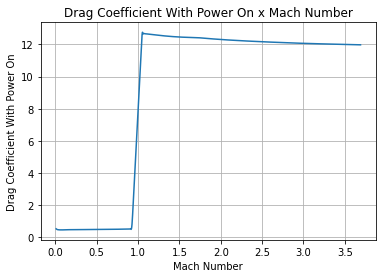

In [4]:
SUBSCALE = Rocket(
    motor=ESTESD12,
    radius=40 / 2000,
    mass=0.232,
    inertiaI=0.0025,
    inertiaZ=0.000277,
    distanceRocketNozzle=-0.128,
    distanceRocketPropellant=-0.128,
    powerOffDrag="data/proxima/subscale_finless_OFF.csv",
    powerOnDrag="data/proxima/subscale_finless_ON.csv",
)

SUBSCALE.setRailButtons([0.01, -0.028])

NoseCone = SUBSCALE.addNose(length=10/1000, kind="OGIVE", distanceToCM=17.2/100)

FinSet = SUBSCALE.addFins(
    4, span=5/100, rootChord=8/100, tipChord=3/100, distanceToCM=-.129
)
SUBSCALE.info()

#### Flight Data

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 722.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 1.06 m/s
Lateral Surface Wind Speed: 2.90 m/s


 Rail Departure State

Rail Departure Time: 0.510 s
Rail Departure Velocity: 22.480 m/s
Rail Departure Static Margin: 2.788 c
Rail Departure Angle of Attack: 8.026°
Rail Departure Thrust-Weight Ratio: 4.182
Rail Departure Reynolds Number: 5.591e+04


BurnOut State

BurnOut time: 1.650 s
Altitude at burnOut: 54.423 m (AGL)
Rocket velocity at burnOut: 231.515 m/s
Freestream velocity at burnOut: 232.008 m/s
Mach Number at burnOut: 0.678
Kinetic energy at burnOut: 6.217e+03 J


Apogee

Apog

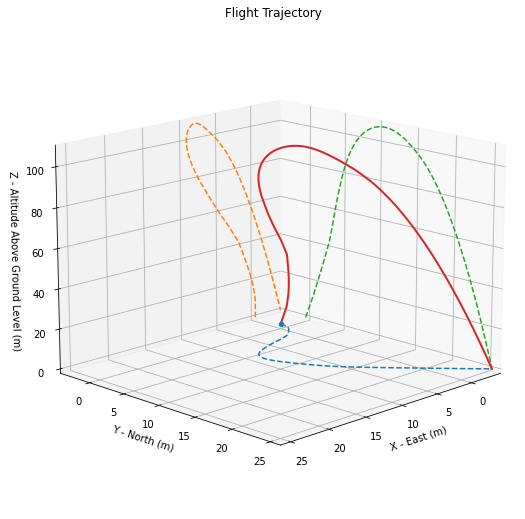



Fin Data

[[ 5.10208143e-01  0.00000000e+00 -1.57354756e-03 ... -6.94988854e-07
  -4.72064269e-06  2.05416837e-21]
 [ 5.44266708e-01  0.00000000e+00 -1.31407699e-03 ... -5.58902242e-07
  -3.94223096e-06  1.72640945e-21]
 [ 5.44266708e-01  0.00000000e+00 -6.74140644e-04 ... -2.84869679e-07
  -2.02242193e-06  8.86619919e-22]
 ...
 [ 8.80808806e+00  0.00000000e+00 -2.22693164e-10 ... -1.38125351e-13
  -6.68079596e-13  2.70419488e-28]
 [ 8.83024622e+00  0.00000000e+00  4.19263522e-10 ... -7.29324950e-12
   1.25779046e-12 -4.36333492e-27]
 [ 8.83144955e+00  0.00000000e+00  6.43051441e-10 ... -1.09781082e-11
   1.92915425e-12 -6.58618240e-27]]


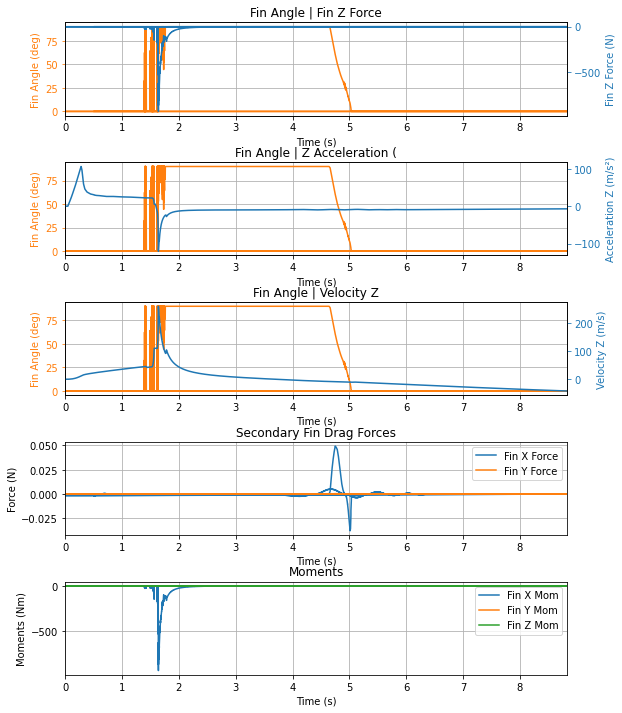



Trajectory Force Plots



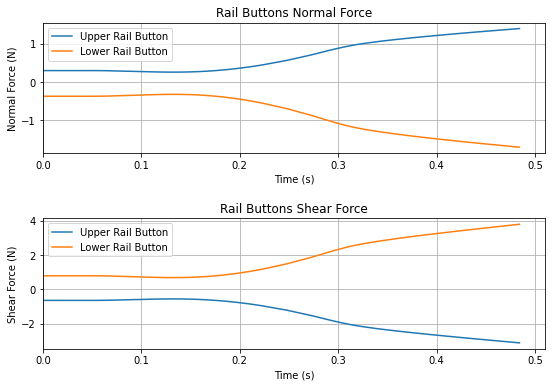

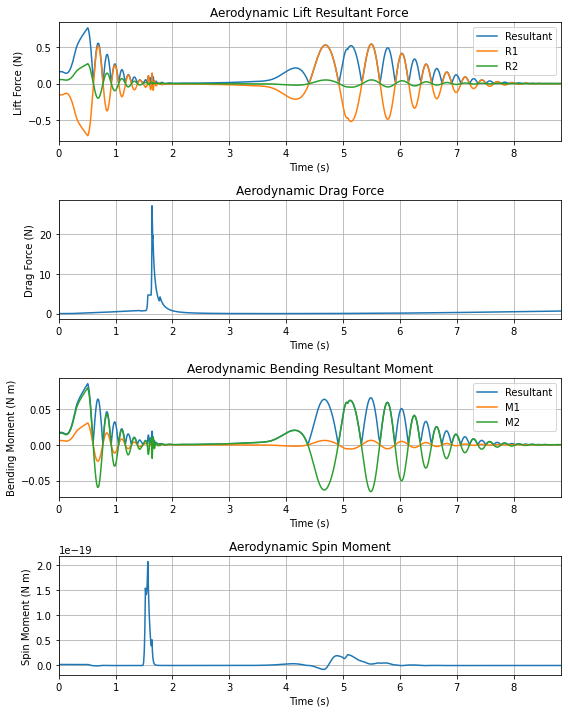



Trajectory Kinematic Plots



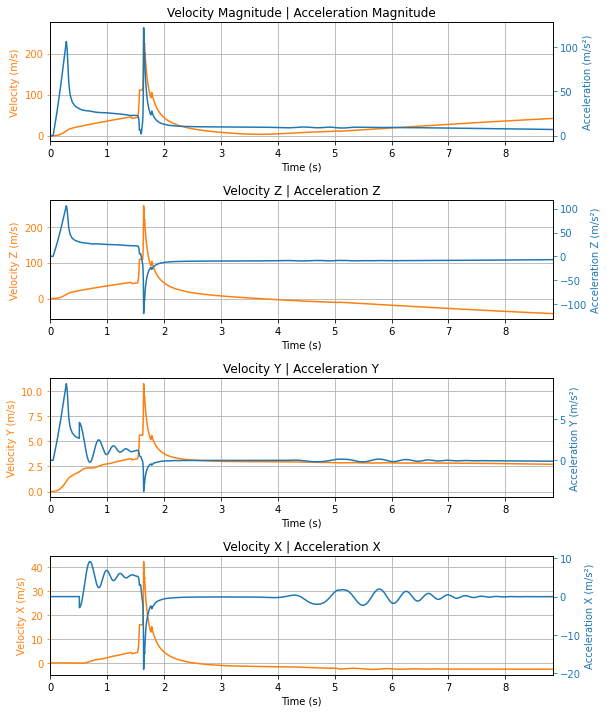



Angular Position Plots



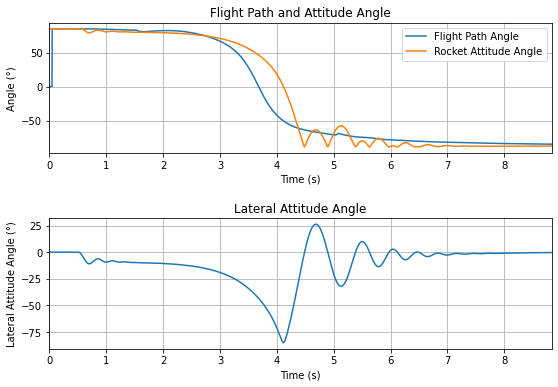



Path, Attitude and Lateral Attitude Angle plots



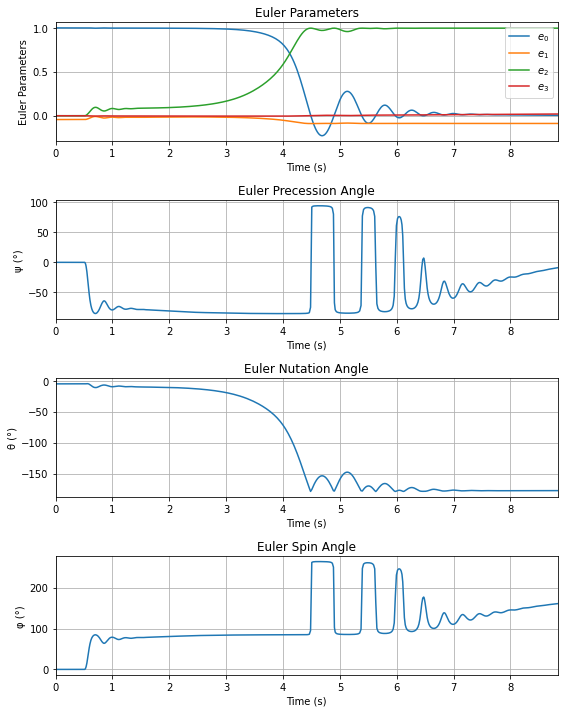



Trajectory Angular Velocity and Acceleration Plots



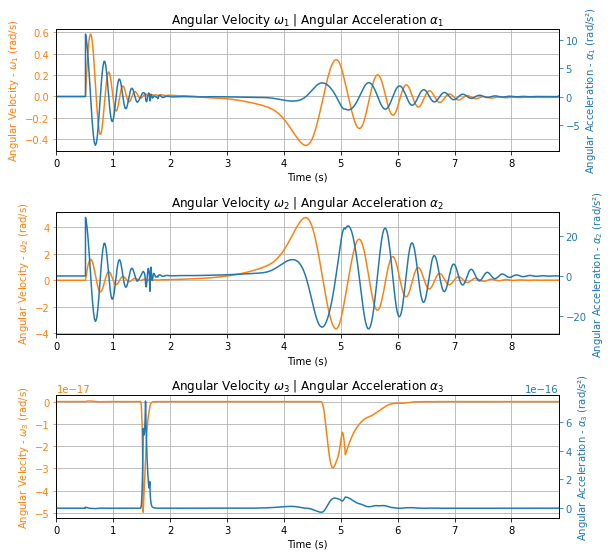



Trajectory Energy Plots



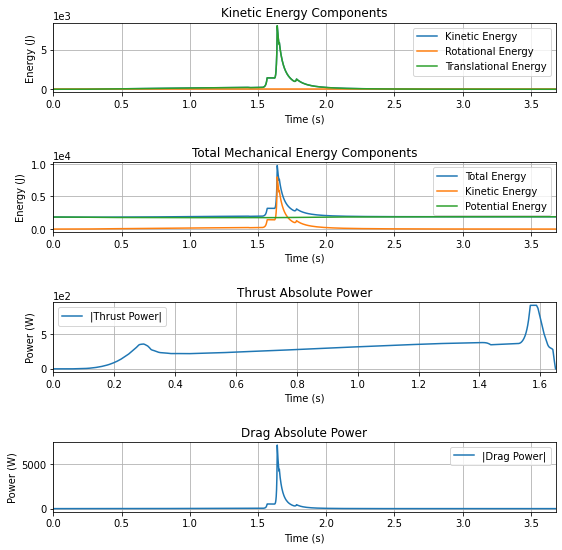



Trajectory Fluid Mechanics Plots



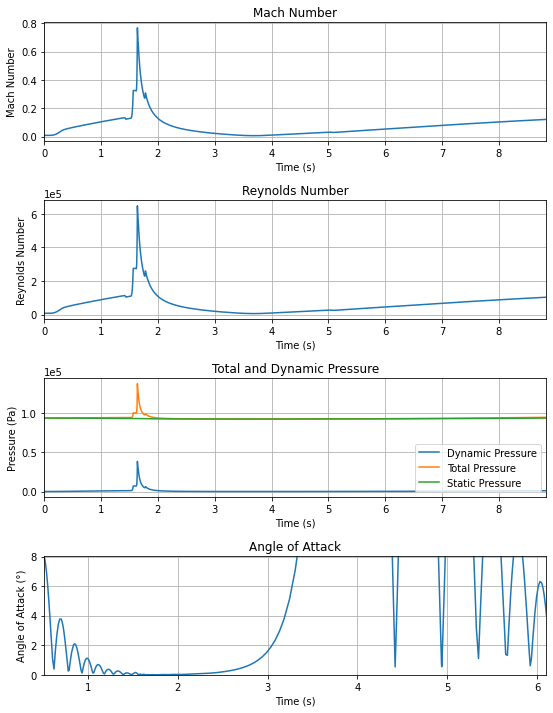



Trajectory Stability and Control Plots



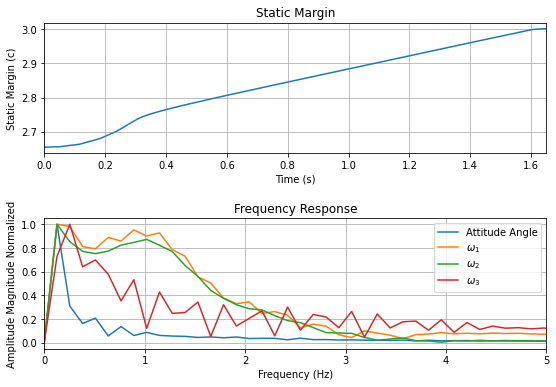

In [5]:
TestFlight = Flight(rocket=SUBSCALE, environment=Env, inclination=85, heading=0, visualiseRocket=False)
#TestFlight.visualise()
TestFlight.allInfo()